In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
num_labels = len(np.unique(y_train))
print("total labels:", (num_labels))

total labels: 10


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
image_size = x_train.shape[1] 
input_size = image_size * image_size

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)
x_train: (60000, 784)
x_test: (10000, 784)


In [ ]:
# Parameters
batch_size = 128 # It is the sample size of inputs to be processed at each training stage. 
hidden_units = 256
dropout = 0.45


def model_MLP(ip_size):
    model = Sequential()

    model.add(Dense(hidden_units, input_dim=ip_size))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(num_labels))

    model.add(Activation('softmax'))
    # print(model.summary())
    return model


In [ ]:
model = model_MLP(input_size)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7343 - accuracy: 0.7639
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2035 - accuracy: 0.9391
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1547 - accuracy: 0.9537
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1297 - accuracy: 0.9603
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1116 - accuracy: 0.9653
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0988 - accuracy: 0.9707
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0926 - accuracy: 0.9722
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0881 - accuracy: 0.9727
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0804 - accuracy: 0.9743
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0764 - accuracy: 0.9762

In [ ]:
def plot_accuracy_vs_epochs(fitted, num_epochs, modelname):
      accuracy = fitted.history['accuracy']
      epochs = range(1,num_epochs+1)
      plt.plot(epochs, accuracy, 'g', label='Training accuracy')
      plt.title('Accuracy vs Epochs of ' + modelname)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.show()

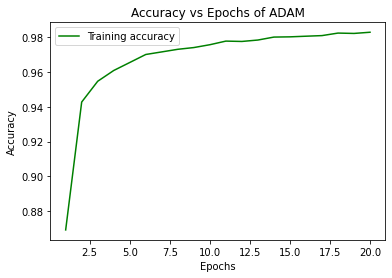

In [ ]:
plot_accuracy_vs_epochs(history, 20, "ADAM")

In [ ]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy:", 100.0*acc)

Accuracy: 98.25000166893005


## ***PART-1***

**Trying different optimizers :**

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.9450 - accuracy: 0.3326
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.8830 - accuracy: 0.7259
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6467 - accuracy: 0.7995
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5547 - accuracy: 0.8302
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5040 - accuracy: 0.8465
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4638 - accuracy: 0.8628
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4238 - accuracy: 0.8753
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4009 - accuracy: 0.8821
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3816 - accuracy: 0.8858
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3665 - accuracy: 0.8920

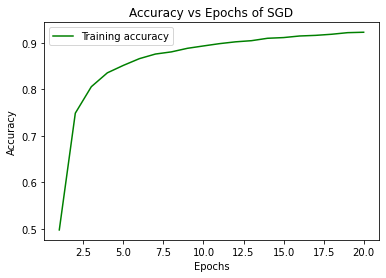

Accuracy: 94.91999745368958


In [ ]:
# stochastic gradient descent without momentum
model_sgd = model_MLP(input_size)
# print(model_sgd.summary())
model_sgd.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc = model_sgd.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

plot_accuracy_vs_epochs(history_sgd, 20, "SGD")

print("Accuracy:", 100.0*acc)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.6448 - accuracy: 0.7975
Epoch 2/20
469/469 [==============================] - 4s 7ms/step - loss: 0.2071 - accuracy: 0.9379
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1590 - accuracy: 0.9538
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1316 - accuracy: 0.9620
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1278 - accuracy: 0.9654
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1169 - accuracy: 0.9677
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1105 - accuracy: 0.9683
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1044 - accuracy: 0.9713
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0950 - accuracy: 0.9724
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0934 - accuracy: 0.9746

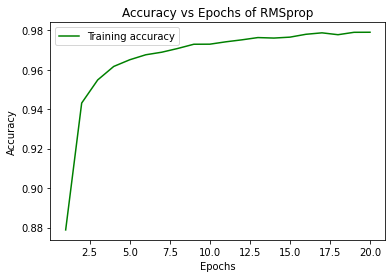

Accuracy: 98.05999994277954


In [ ]:
# RMSProp
model_rmsprop = model_MLP(input_size)
# print(model_sgd.summary())
model_rmsprop.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history_rms = model_rmsprop.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc = model_rmsprop.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

plot_accuracy_vs_epochs(history_rms, 20, "RMSprop")

print("Accuracy:", 100.0*acc)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.1225 - accuracy: 0.6262
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3377 - accuracy: 0.8988
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2624 - accuracy: 0.9223
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2109 - accuracy: 0.9365
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1930 - accuracy: 0.9429
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1724 - accuracy: 0.9487
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1571 - accuracy: 0.9543
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1410 - accuracy: 0.9578
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1364 - accuracy: 0.9591
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1290 - accuracy: 0.9609

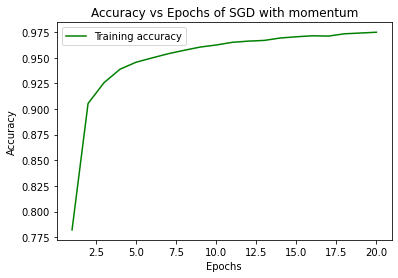

Accuracy: 98.12999963760376


In [ ]:
# stochastic gradient descent with momentum
model_sgdmomentum = model_MLP(input_size)
# print(model_sgd.summary())
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_sgdmomentum.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history_sgd_momentum = model_sgdmomentum.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc_sgdmomentum = model_sgdmomentum.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

plot_accuracy_vs_epochs(history_sgd_momentum, 20, "SGD with momentum")

print("Accuracy:", 100.0*acc_sgdmomentum)

***Try different weight initialisations of the neural network***

In [ ]:
# https://keras.io/api/layers/initializers/

In [ ]:
from tensorflow.keras import initializers
def model_MLP_with_weight_init(ip_size, weight_init):
    model = Sequential()

    model.add(Dense(hidden_units, kernel_initializer=weight_init, input_dim=ip_size))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(num_labels))

    model.add(Activation('softmax'))
    # print(model.summary())
    return model

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 3.2939 - accuracy: 0.5205
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6378 - accuracy: 0.7996
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4781 - accuracy: 0.8517
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3789 - accuracy: 0.8846
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3217 - accuracy: 0.9001
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2984 - accuracy: 0.9059
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2676 - accuracy: 0.9175
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2420 - accuracy: 0.9250
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2327 - accuracy: 0.9275
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2160 - accuracy: 0.9342

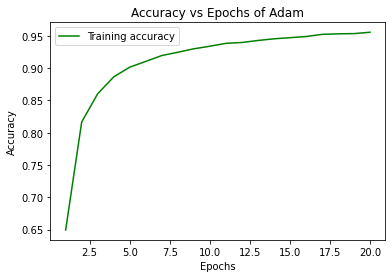

Accuracy: 97.49000072479248


In [ ]:
# weight initialisation of the neural network : NORMAL

initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
model_Normal = model_MLP_with_weight_init(input_size, initializer)
model_Normal.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_adm = model_Normal.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc = model_Normal.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

plot_accuracy_vs_epochs(history_adm, 20, "Adam")

print("Accuracy:", 100.0*acc)

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 16.3073 - accuracy: 0.1083
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3177 - accuracy: 0.1117
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3072 - accuracy: 0.1143
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3036 - accuracy: 0.1126
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3020 - accuracy: 0.1102
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3028 - accuracy: 0.1123
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3029 - accuracy: 0.1094
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1148
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3017 - accuracy: 0.1126
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3017 - accuracy: 0.111

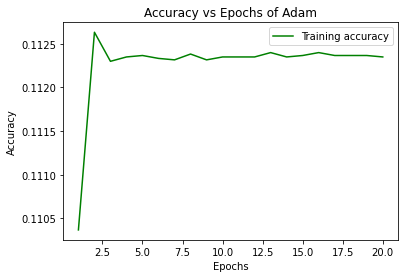

Accuracy: 11.349999904632568


In [ ]:
# weight initialisation of the neural network : UNIFORM

initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
model_Uniform = model_MLP_with_weight_init(input_size, initializer)
model_Uniform.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_adm = model_Uniform.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc = model_Uniform.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

plot_accuracy_vs_epochs(history_adm, 20, "Adam")

print("Accuracy:", 100.0*acc)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7389 - accuracy: 0.7630
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2111 - accuracy: 0.9379
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1548 - accuracy: 0.9534
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1278 - accuracy: 0.9617
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1186 - accuracy: 0.9634
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1018 - accuracy: 0.9688
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0899 - accuracy: 0.9719
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0896 - accuracy: 0.9723
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0812 - accuracy: 0.9747
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0787 - accuracy: 0.9752

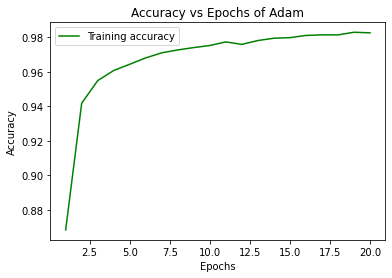

Accuracy: 98.19999933242798


In [ ]:
# weight initialisation of the neural network : XAVIER(normal)

initializer = tf.keras.initializers.GlorotNormal()
model_Xavier = model_MLP_with_weight_init(input_size, initializer)
model_Xavier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_adm = model_Xavier.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc = model_Xavier.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

plot_accuracy_vs_epochs(history_adm, 20, "Adam")

print("Accuracy:", 100.0*acc)

### **Try different learning rates and also perform exponential annealing on the learning rate.**

In [ ]:
learning_rate = [0.005, 0.01, 0.05, 0.1, 0.2]
accuracies = []

In [ ]:
for l_rate in learning_rate:
    model_adm = model_MLP(input_size)
    opt = keras.optimizers.Adam(learning_rate=l_rate)
    model_adm.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history_sgd = model_adm.fit(x_train, y_train, epochs=20, batch_size=batch_size)
    _, acc = model_adm.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
    print("Accuracy:", 100.0*acc)
    accuracies.append(100.0*acc)



Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5483 - accuracy: 0.8264
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2391 - accuracy: 0.9315
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2200 - accuracy: 0.9358
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1934 - accuracy: 0.9443
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1932 - accuracy: 0.9451
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1827 - accuracy: 0.9481
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1827 - accuracy: 0.9508
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1707 - accuracy: 0.9532
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1682 - accuracy: 0.9546
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1723 - accuracy: 0.9542

No handles with labels found to put in legend.


learning rates :  [0.005, 0.01, 0.05, 0.1, 0.2]
accuracies :  [97.40999937057495, 95.660001039505, 30.21000027656555, 10.100000351667404, 8.92999991774559]


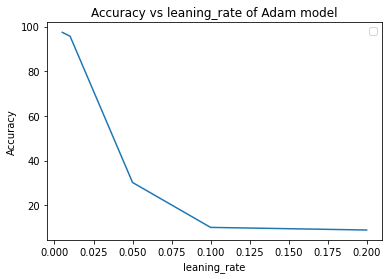

In [ ]:
print ("learning rates : ", learning_rate)
print ("accuracies : ", accuracies)

plt.plot(learning_rate, accuracies)
plt.title('Accuracy vs leaning_rate of Adam model')
plt.xlabel('leaning_rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Exponential annealing on the learning rate**

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)
opt = keras.optimizers.SGD(learning_rate=lr_schedule)

model_sgd = model_MLP(input_size)
model_sgd.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=20, batch_size=batch_size)
_, acc = model_sgd.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print("Accuracy:", 100.0*acc)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 1.9590 - accuracy: 0.3209
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.9024 - accuracy: 0.7155
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.6721 - accuracy: 0.7914
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5699 - accuracy: 0.8262
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5077 - accuracy: 0.8483
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4572 - accuracy: 0.8644
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4277 - accuracy: 0.8705
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4047 - accuracy: 0.8778
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3798 - accuracy: 0.8871
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3630 - accuracy: 0.8909

# **PART-2**

In [ ]:
import torch
import torchvision as tv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# repeatedly reduce the size
class Autoencoder_Linear(nn.Module):
    def __init__(self, last_layer):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 200), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(200, 150),
            nn.ReLU(),
            # nn.Linear(64, 12),
            # nn.ReLU(),
            nn.Linear(150, last_layer) # -> N, 3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(last_layer, 150),
            nn.ReLU(),
            nn.Linear(150,200),
            nn.ReLU(),
            # nn.Linear(64, 128),
            # nn.ReLU(),
            nn.Linear(200, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

In [ ]:
n_last_layers = 120
num_epochs=2
criterion = nn.MSELoss()
model = Autoencoder_Linear(n_last_layers)
x_train_encoded = []
for img in x_train:
    img = torch.from_numpy(img)
    recon, encod = model(img)
    np_img = encod.detach().numpy()
    x_train_encoded.append(np_img)

x_test_encoded = []
for img in x_test:
    img = torch.from_numpy(img)
    recon, encod = model(img)
    np_img = encod.detach().numpy()
    x_test_encoded.append(np_img)


In [ ]:
x_train_encoded = np.array(x_train_encoded)
x_test_encoded = np.array(x_test_encoded)

In [ ]:
print("number of original feature : ", input_size)
print ("number of reduced features : ", n_last_layers)

number of original feature :  784
number of reduced features :  120


In [ ]:
ip_size = n_last_layers
model_adm = model_MLP(ip_size)
# print(model_sgd.summary())
model_adm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_adm = model_adm.fit(x_train_encoded, y_train, batch_size=batch_size, epochs=20)
_, acc = model_adm.evaluate(x_test_encoded, y_test, batch_size=batch_size, verbose=0)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.6944 - accuracy: 0.4269
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.8356 - accuracy: 0.7278
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6991 - accuracy: 0.7741
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6283 - accuracy: 0.7954
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5886 - accuracy: 0.8092
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5388 - accuracy: 0.8245
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5206 - accuracy: 0.8321
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4900 - accuracy: 0.8433
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4720 - accuracy: 0.8455
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4574 - accuracy: 0.8535

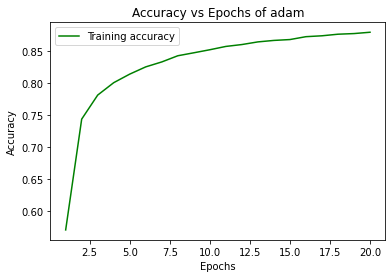

Accuracy: 91.21000170707703


In [ ]:
plot_accuracy_vs_epochs(history_adm, 20, "adam")

print("Accuracy:", 100.0*acc)

We see that accuracy of adam model decreases, as we decrease the number of features.
  
It was previously around 98% with 784 features, and now have reduced to 91% with 120 features.
